In [489]:
from cassandra.cluster import Cluster
cluster = Cluster(['localhost'],port=32769)

/Users/Nx/anaconda/envs/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  


In [490]:
session = cluster.connect()
session

In [491]:
session.set_keyspace('twitter')

In [492]:
rows = session.execute('SELECT * FROM twitter.rawtweets')

In [493]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import seaborn as sns
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Nx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [494]:
def to_TF(tweets):
    import pandas as pd
    import nltk
    tweets = [w for l in tweets for w in l]

    ## Compute the frequency distribution of the words as a dictionary
    fdist = nltk.FreqDist(tweets) 
    ## Convert the dictionary to a dataframe contaning the words and
    ## counts indexed by the words, and then take the transpose.
    count_frame = pd.DataFrame(fdist, index =[0]).T
    count_frame.columns = ['Count']
    return(count_frame.sort_values('Count', ascending = False))

In [495]:
def wf_bar(wf):
    import matplotlib.pyplot as plt
    ## Barplot of the most fequent words.   
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca()
    ax.invert_yaxis()
    wf['Count'][:30].plot(kind = 'barh', ax = ax)
    ax.set_title('Frequency of the most common words')
    ax.set_ylabel('Word')
    ax.set_xlabel('Frequency of word')
    ax.invert_yaxis()
    plt.show()
    return 'Done'

In [496]:
query = 'SELECT * FROM twitter.rawtweets lIMIT 100000'
df = pd.DataFrame(list(session.execute(query)))

In [497]:
sp = {ch : None for ch in string.punctuation}
ttb = str.maketrans(sp)
# ttb

In [498]:
stop_dutch_words = stopwords.words('dutch')

In [499]:
df.tweet = df.tweet.str.lower()
df.tweet = df.tweet.str.translate(ttb)

tknzr = TweetTokenizer()
df.tweet = df.tweet.apply(lambda tw : tknzr.tokenize(tw))

stop_dutch_words = stopwords.words('dutch')
stop_dutch_words.extend(['rt','...'])
df.tweet = df.tweet.apply(lambda tw: [w for w in tw if (w.lower() not in stop_dutch_words) and (len(w) > 1)])

stemmer = SnowballStemmer("dutch")
df['cleantweets'] = df.tweet.apply(lambda tw: [stemmer.stem(w) for w in tw if 'http' not in w.lower()])

In [500]:
df.head()

,user,creationdate,geolocation,tweet,cleantweets
0,Blauhelm,2017-12-14T13:58:44+0100,"GeoLocation{latitude=53.18048534, longitude=8....","[arbeiten, oldenburg, alexandersfeld, httpstco...","[arbeit, oldenburg, alexandersfeld]"
1,RabiaatRechts,2017-12-14T13:28:56+0100,,"[jpaternotte, cthijm, mensen, zoiets, opstelle...","[jpaternot, cthijm, mens, zoiet, opstell, zull..."
2,Ambtenaar 2.0,2017-12-14T13:36:00+0100,,"[carmennolten, nieuwe, blog, online, platformo...","[carmennolt, nieuw, blog, onlin, platformo, ta..."
3,PRINT,2017-12-14T13:17:00+0100,,"[patrickloonstra, patrick, even, mailen, pauli...","[patrickloonstra, patrick, even, mail, paulina..."
4,Trea Alers,2017-12-14T14:19:19+0100,,"[ligt, jaaroverzichten, lijken, ieder, jaar, v...","[ligt, jaaroverzicht, lijk, ieder, jar, vroege..."


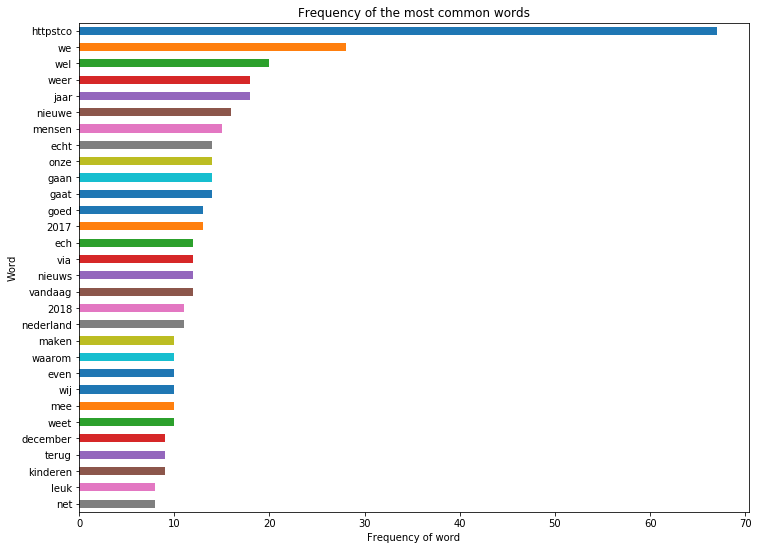

'Done'

In [501]:
 wf_bar(to_TF(df.tweet))

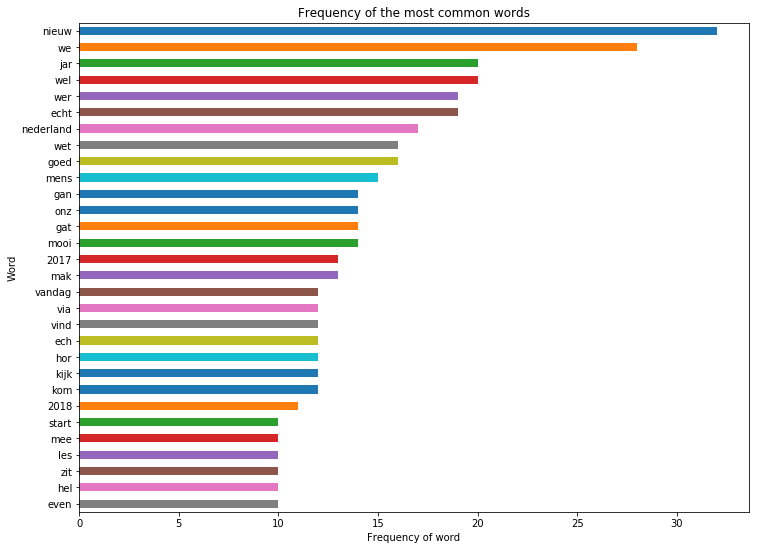

'Done'

In [502]:
 wf_bar(to_TF(df.cleantweets))